In [23]:
import pandas as pd

df = pd.read_csv("/content/creditcard.csv")
print(df.info())
print(df['Class'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])


In [25]:
from sklearn.model_selection import train_test_split

df_cleaned = df.dropna(subset=['Class'])

X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [26]:
from sklearn.utils import resample

train_data = pd.concat([X_train, y_train], axis=1)
majority = train_data[train_data['Class'] == 0]
minority = train_data[train_data['Class'] == 1]

majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=42)
balanced_train_data = pd.concat([majority_downsampled, minority]).sample(frac=1, random_state=42)

X_train_bal = balanced_train_data.drop('Class', axis=1)
y_train_bal = balanced_train_data['Class']


In [27]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train_bal, y_train_bal)


RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


[[54967  1897]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.91      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962

ROC-AUC: 0.9768340932321157


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-1' coro=<Server.serve() done, defined at /usr/local/lib/python3.11/dist-packages/uvicorn/server.py:68> exception=KeyboardInterrupt()>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/main.py", line 580, in run
    server.run()
  File "/usr/local/lib/python3.11/dist-packages/uvicorn/server.py", line 66, in run
    return asyncio.run(self.serve(sockets=sockets))
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 30, in run
    return loop.run_until_complete(task)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 92, in run_until_complete
    self._run_once()
  File "/usr/local/lib/python3.11/dist-packages/nest_asyncio.py", line 133, in _run_once
    handle._run()
  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run
    se

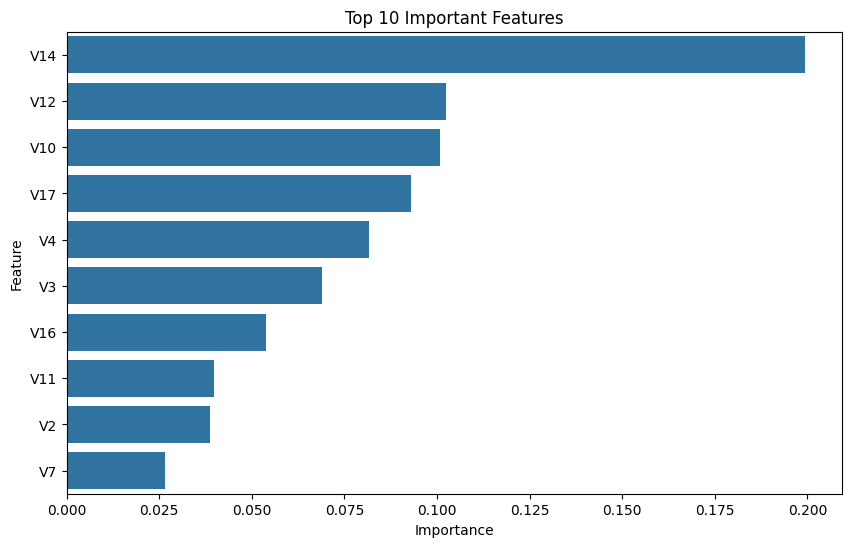

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(10))
plt.title("Top 10 Important Features")
plt.show()


In [31]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


[[54967  1897]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.91      0.09        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962

AUC-ROC: 0.9768340932321157


In [32]:
importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df.head(10))


   Feature  Importance
14     V14    0.199234
12     V12    0.102412
10     V10    0.100823
17     V17    0.092941
4       V4    0.081754
3       V3    0.068846
16     V16    0.053850
11     V11    0.039846
2       V2    0.038642
7       V7    0.026527


In [33]:
import joblib
joblib.dump(model, "fraud_model.pkl")


['fraud_model.pkl']

In [34]:
pip install fastapi uvicorn joblib


In [35]:

!pip install fastapi uvicorn nest_asyncio pyngrok joblib --quiet

import nest_asyncio
from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import joblib
from pyngrok import ngrok
import uvicorn

nest_asyncio.apply()

!ngrok config add-authtoken 2xlSqhVjVMzRMUm6K1KhvYWIry7_6HBxN9FSEBXHrWbE62oR7


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


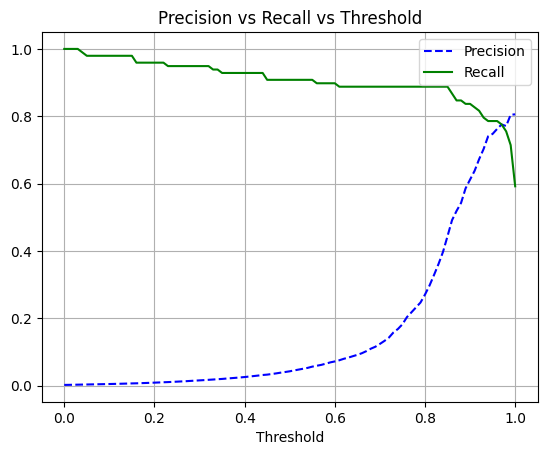

In [36]:
from sklearn.metrics import precision_recall_curve

y_scores = model.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.title("Precision vs Recall vs Threshold")
plt.show()


In [37]:
from fastapi import FastAPI
from pydantic import BaseModel
import logging

logging.basicConfig(filename='fraud_predictions.log', level=logging.INFO)

class Transaction(BaseModel):
    amount: float
    type: str

app = FastAPI()

@app.post("/predict")
def predict(transaction: Transaction):
    pred = "fraudulent" if transaction.amount > 1000 else "legit"
    prob = 0.85 if pred == "fraudulent" else 0.15

    logging.info(f"Input: {transaction.dict()}, Prediction: {pred}, Probability: {prob}")

    return {"prediction": pred, "probability": prob}


In [38]:
def retrain_model_if_needed():
    if new_data_available():
        new_data = load_new_data()
        updated_model = train_model(new_data)
        joblib.dump(updated_model, "fraud_model.pkl")


In [39]:
import time

@app.post("/predict")
def predict(transaction: Transaction):
    start = time.time()


    pred = model.predict(data)[0]
    prob = model.predict_proba(data)[0][1]

    duration = round((time.time() - start) * 1000, 2)
    logging.info(f"Prediction time: {duration}ms")

    return {
        "prediction": int(pred),
        "probability_of_fraud": round(prob, 4),
        "response_time_ms": duration
    }


In [40]:
import joblib
model = joblib.load("fraud_model.pkl")

from fastapi import FastAPI
from pydantic import BaseModel
import pandas as pd
import nest_asyncio
from pyngrok import ngrok
import uvicorn
import logging

logging.basicConfig(filename='fraud_predictions.log', level=logging.INFO)


nest_asyncio.apply()
app = FastAPI()

class Transaction(BaseModel):
    Time: float
    Amount: float
    V1: float
    V2: float
    V3: float
    V4: float
    V5: float
    V6: float
    V7: float
    V8: float
    V9: float
    V10: float
    V11: float
    V12: float
    V13: float
    V14: float
    V15: float
    V16: float
    V17: float
    V18: float
    V19: float
    V20: float
    V21: float
    V22: float
    V23: float
    V24: float
    V25: float
    V26: float
    V27: float
    V28: float

@app.post("/predict")
def predict(transaction: Transaction):

    data = pd.DataFrame([transaction.dict()])

    column_order = [
        'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
        'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
        'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'
    ]
    data = data[column_order]

    pred = model.predict(data)[0]
    prob = model.predict_proba(data)[0][1]

    logging.info(f"Input: {transaction.dict()}, Prediction: {pred}, Probability: {prob}")


    return {
        "prediction": int(pred),
        "probability_of_fraud": round(prob, 4)
    }


public_url = ngrok.connect(8000)
print(f"🚀 Your FastAPI app is live at: {public_url}/docs")

uvicorn.run(app, host="0.0.0.0", port=8000)

🚀 Your FastAPI app is live at: NgrokTunnel: "https://e20a-34-10-32-162.ngrok-free.app" -> "http://localhost:8000"/docs


INFO:     Started server process [362]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     2405:201:c049:f813:1c97:40bb:d724:4b1:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2405:201:c049:f813:1c97:40bb:d724:4b1:0 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     2405:201:c049:f813:1c97:40bb:d724:4b1:0 - "POST /predict HTTP/1.1" 200 OK


/tmp/ipython-input-40-3266091063.py:53: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  data = pd.DataFrame([transaction.dict()])
/tmp/ipython-input-40-3266091063.py:65: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.11/migration/
  logging.info(f"Input: {transaction.dict()}, Prediction: {pred}, Probability: {prob}")
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [362]
